In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# **Problema:**

El dataset de casas de California. Es un conjunto de datos que contiene información sobre los precios medios de las viviendas y otras características de los distritos de California, basado en el censo de 1990.



**longitude**: es la longitud del centroide del distrito, expresada en grados. Esta variable indica la posición geográfica del distrito en el mapa.

**latitude**: es la latitud del centroide del distrito, expresada en grados. Esta variable también indica la posición geográfica del distrito en el mapa.

**housing_median_age**: es la edad media de las casas en el distrito, expresada en años. Esta variable refleja el estado y la antigüedad de las viviendas en el distrito.

**total_rooms**: es el número total de habitaciones en el distrito, sin distinguir entre tipos de habitaciones. Esta variable refleja el tamaño y la capacidad de las viviendas en el distrito.

**total_bedrooms**: es el número total de dormitorios en el distrito. Esta variable refleja el número de espacios destinados al descanso en las viviendas del distrito.

**population**: es el número de personas que viven en el distrito. Esta variable refleja la densidad y la demanda de vivienda en el distrito.


**households**: es el número de hogares en el distrito. Un hogar es un grupo de personas que residen dentro de una casa. Esta variable refleja la estructura y la composición de las familias en el distrito.


**median_income**: es el ingreso medio por hogar en el distrito, expresado en miles de dólares ($1000). Esta variable refleja el nivel socioeconómico y el poder adquisitivo de los habitantes del distrito.


**median_house_value**: es el valor medio de las casas en el distrito, expresado en cientos de miles de dólares ($100,000). Esta variable es la variable objetivo que se quiere predecir. Refleja el precio y la calidad de las viviendas en el distrito.

---

# **Análisis del data frame**

## **1. Leer el data frame en formato csv en la dirección:** 

https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv

In [6]:
data = pd.read_csv(f"https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## **2. Entender  el estado de los datos, para ello puedo emplear los comandos básicos de pandas**

  ```python
  df.info()
  df.describe()
  df.isnull().sum()
  df.isna().sum()
```
Estos dos últimos son equivalentes.

In [7]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## **3. Determinar los elementos únicos dentro de la columna ocean_proximity.**

In [10]:
data.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

## **4. Para las columnas**

```python
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value"]
```

**Determinar el promedio de cada una de las columnas asociado a cada elementos unico de ocean_proximity, intenta con la operación groupby.**

In [11]:
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value"]
data1 = data[cols]
data1.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [12]:
data1.groupby(data.ocean_proximity).mean()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,
<1H OCEAN,29.279225,2628.343586,546.539185,1520.290499,517.744965,4.230682,240084.285464
INLAND,24.271867,2717.742787,533.881619,1391.046252,477.447565,3.208996,124805.392001
ISLAND,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,37.730131,2493.589520,514.182819,1230.317467,488.616157,4.172885,259212.311790
NEAR OCEAN,29.347254,2583.700903,538.615677,1354.008653,501.244545,4.005785,249433.977427


## **5. Construye un histograma para cada columna, puede emplear la libreria de seaborn.**

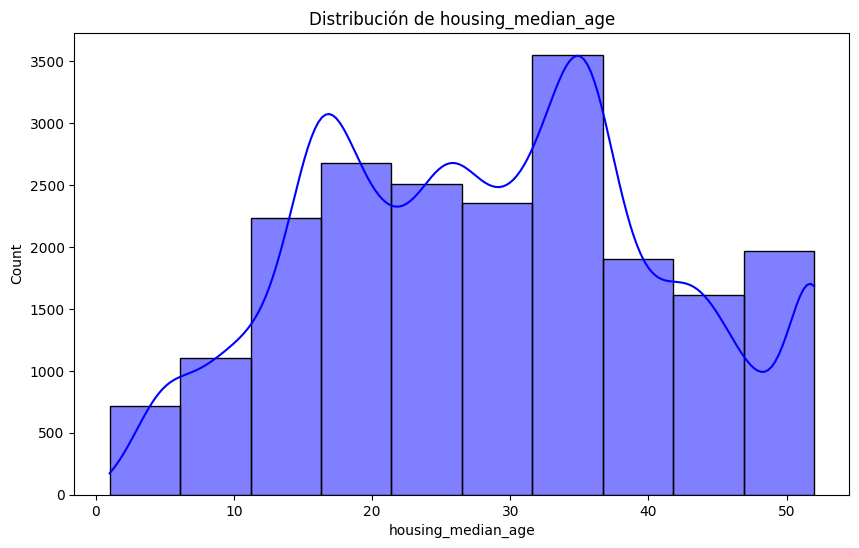

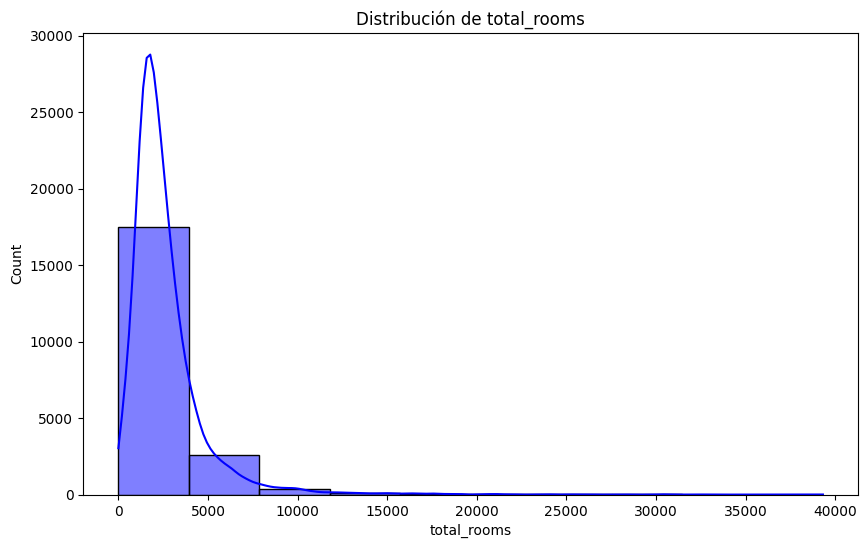

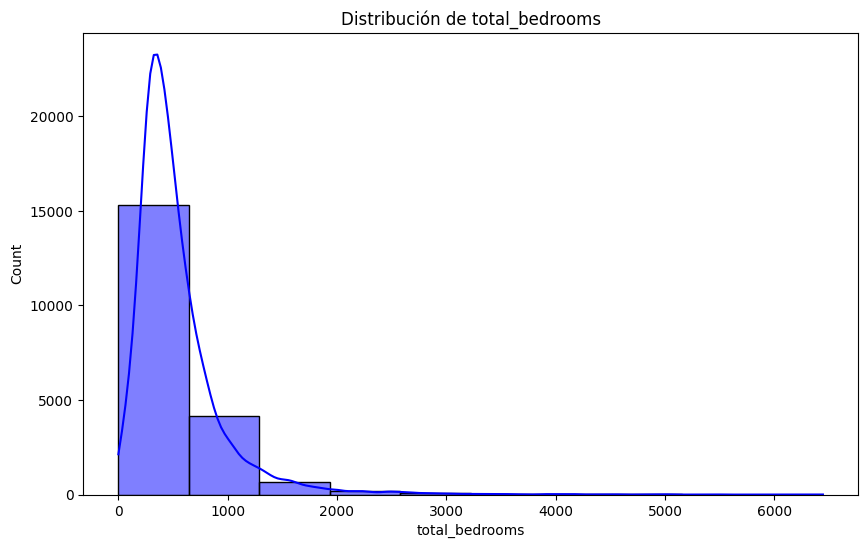

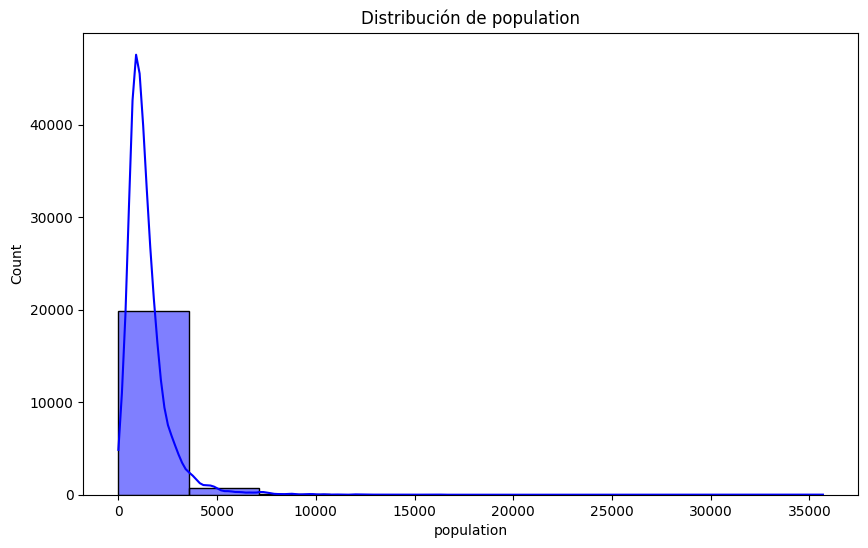

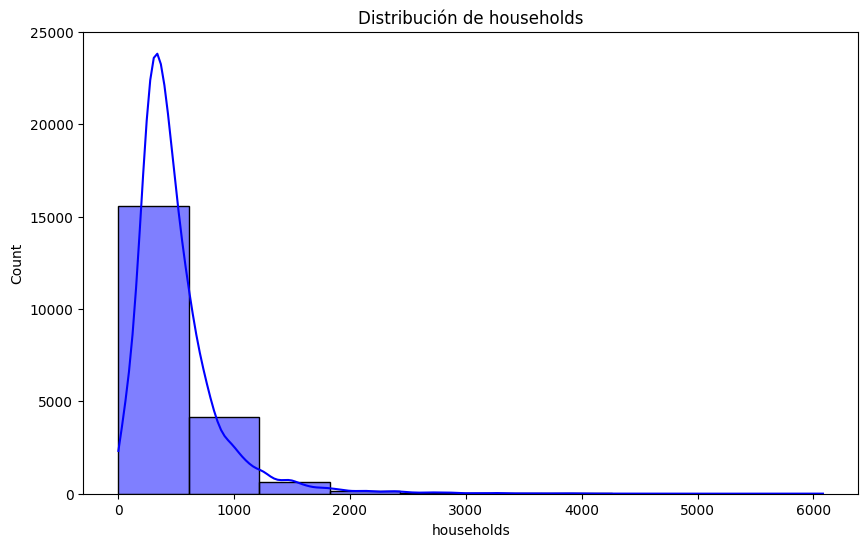

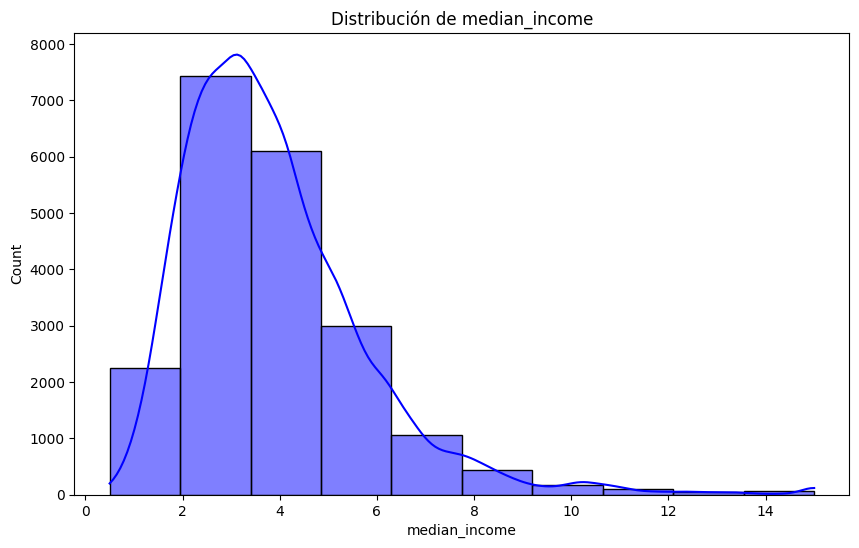

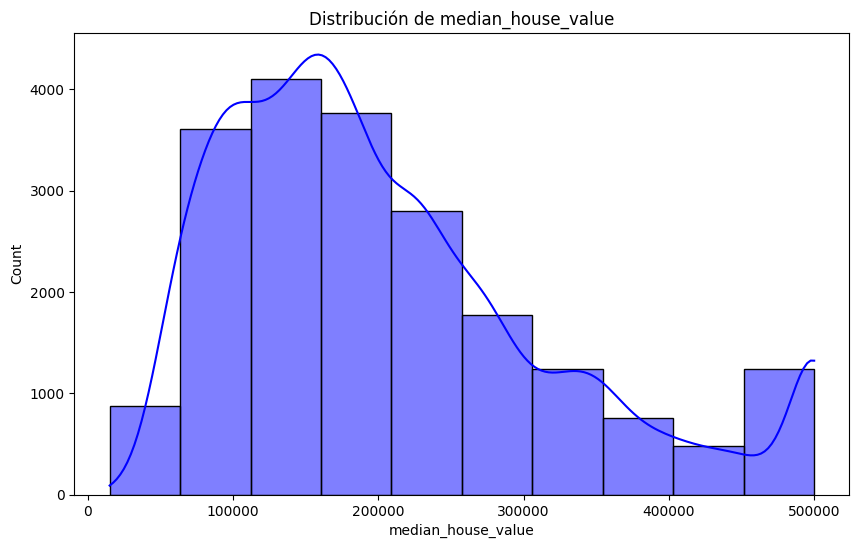

In [13]:
for col in cols:
    plt.figure(figsize=(10,6))
    # df[df['species'] == specie]['body_mass_g'].plot(kind='hist', figsize=(10, 5), title=f'Distribución de la masa corporal de los pingüinos de especie {specie}', color='blue')
    
    sns.histplot(data1[col], bins=10, kde=True, color='blue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.show()

## **7. Empleando el siguiente código realiza el gráfico boxplot**

```python
#draw boxplot
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
#set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()
```

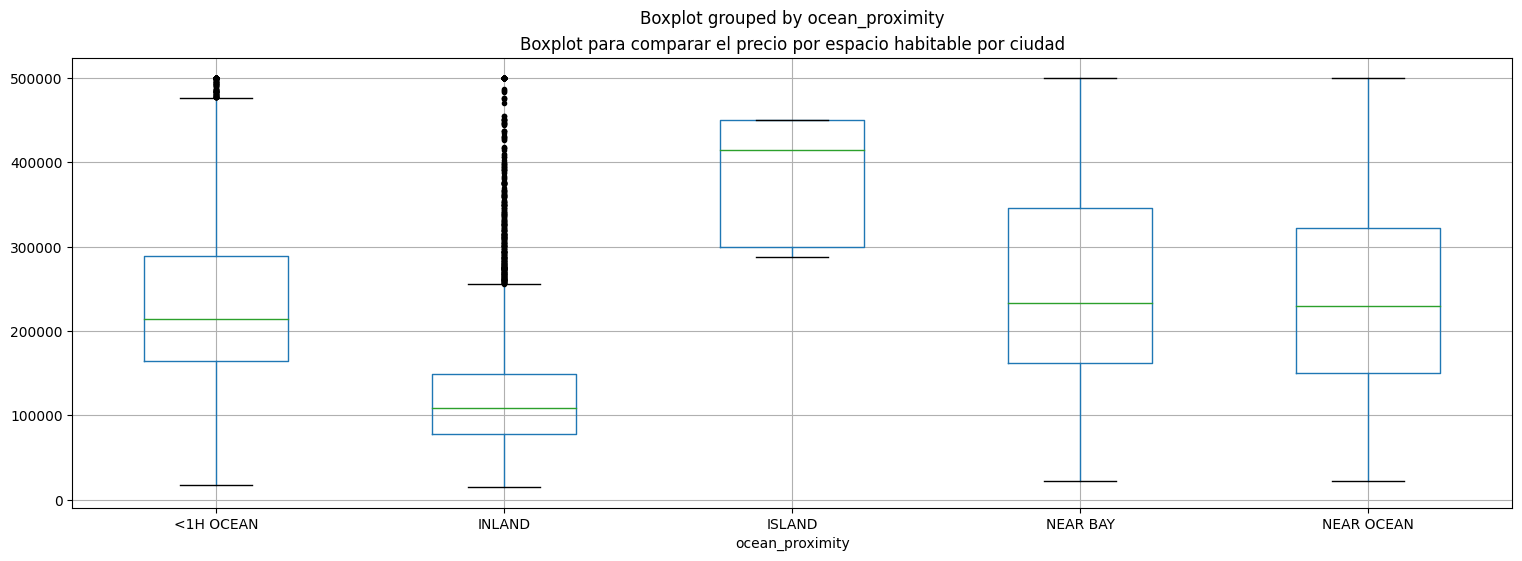

In [14]:
#draw boxplot
data.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
#set title
plt.title('Boxplot para comparar el precio por espacio habitable por ciudad')
plt.show()

## **8. Determina la matrix de correlación.**

### [Matrix de correlación](https://en.wikipedia.org/wiki/Correlation)

¿Como se determina la matrix de correlación?

<!-- ![Matrix de correlación](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png) -->



```python
corr_matrix = df.corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.show()
```

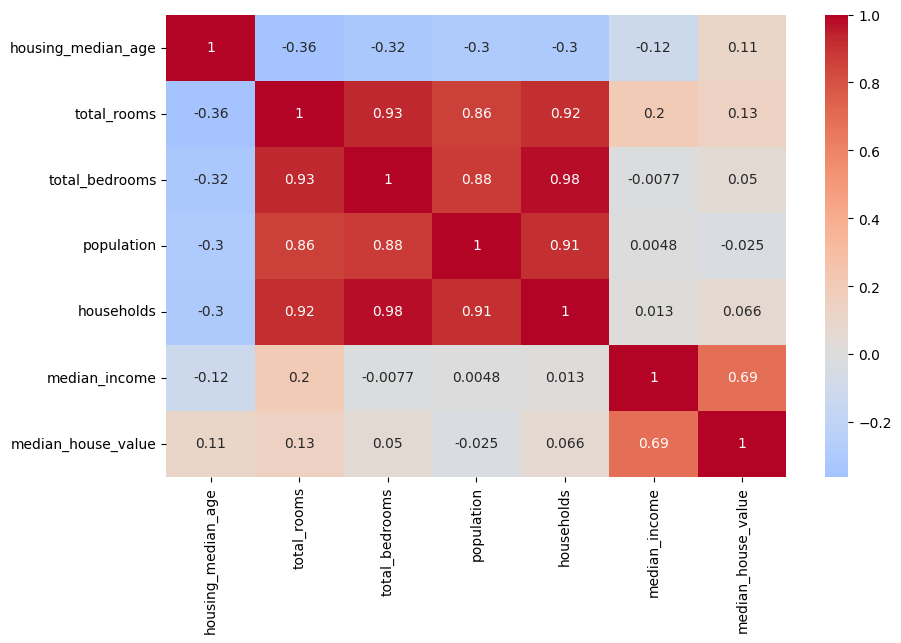

In [15]:
corr_matrix = data1.corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.show()

## **9. con las columnas, realiza un grafico pairplot empleando seaborn  de python.**
```python
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
```

In [16]:
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
data2 = data[cols]

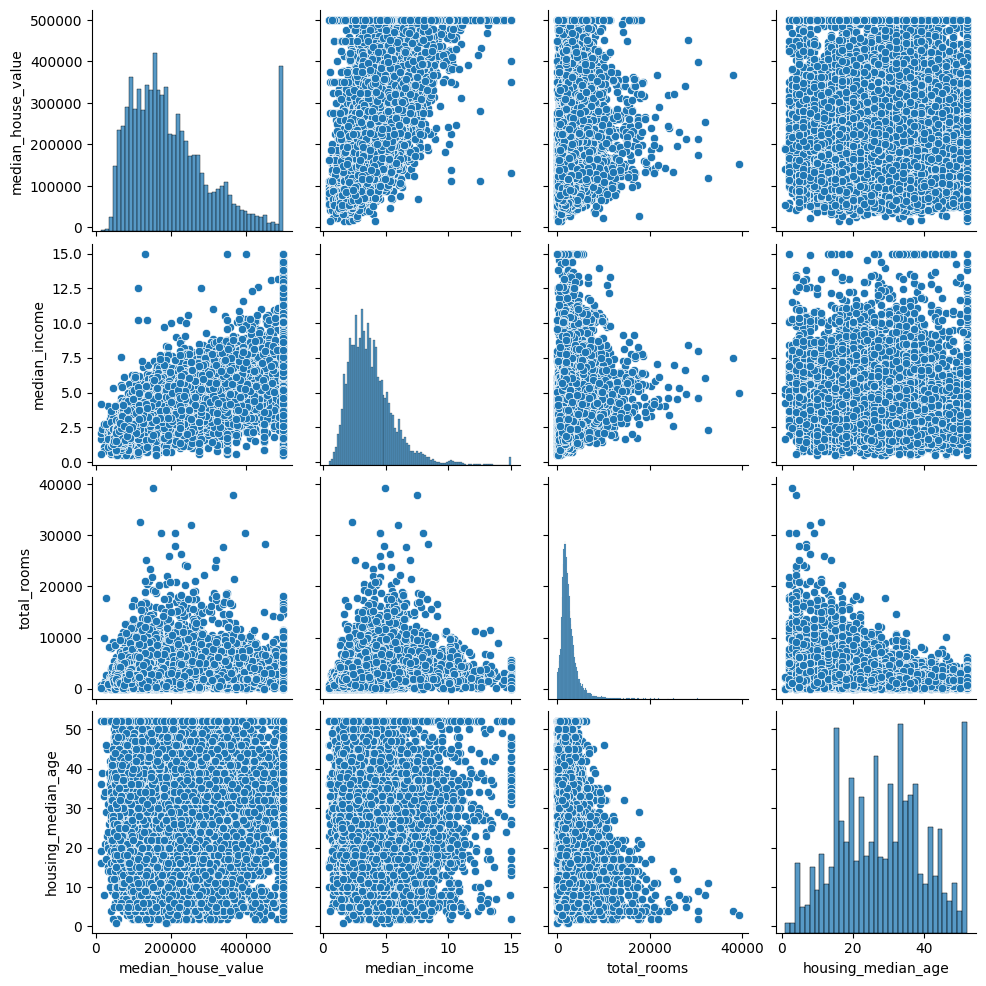

In [17]:
sns.pairplot(data2)
plt.show()

## **10. Realiza un scatterplot con la libreria seaborn de python, el color del gráfico puede ser empleado con la columna median_house_value**

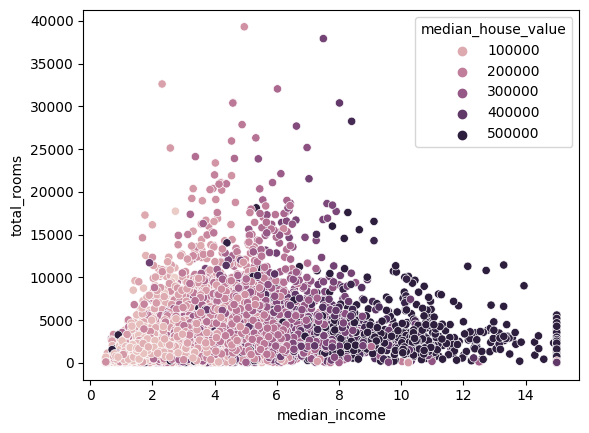

In [18]:
sns.scatterplot(data2, x=cols[1], y=cols[2], hue='median_house_value')
plt.show()

# **Preparacion del data frame**


## **11. ¿La siguiente linea es adecuada para separar el dataframe en datos de entrenamiento de test?, ¿que pasa en la división de los datos?**


```python
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

```

In [19]:
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(data, test_size = 0.2, random_state = 42)

print(f"Tamaño de la muestra de entrenamiento: {len(train_set)}")
print(f"Tamaño de la muestra de prueba: {len(test_set)}")
print(f"Tamaño de la población: {len(train_set) + len(train_set)}")

Tamaño de la muestra de entrenamiento: 16512
Tamaño de la muestra de prueba: 4128
Tamaño de la población: 33024


La población completa es de 33024 registros, lo cuál es relativamente aceptable para considerarse un buen tamaño de datos. Sin embargo, los datos no son homogéneos, y esto se puede afirmar a partir de las visualizaciones que ya hicimos. Por ejemplo, si los datos fuesen homogéneos, esperaríamos que la distribución de cada columna se aproximara a una normal. Sin embargo, hay columnas como households, population, total_rooms total_bedrooms y median_income presentan claros sesgos hacia valores más bajos.

In [20]:
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value"]

In [21]:
train_set[cols].head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
14196,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0
8267,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0
17445,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0
14265,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0
2271,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0


In [22]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


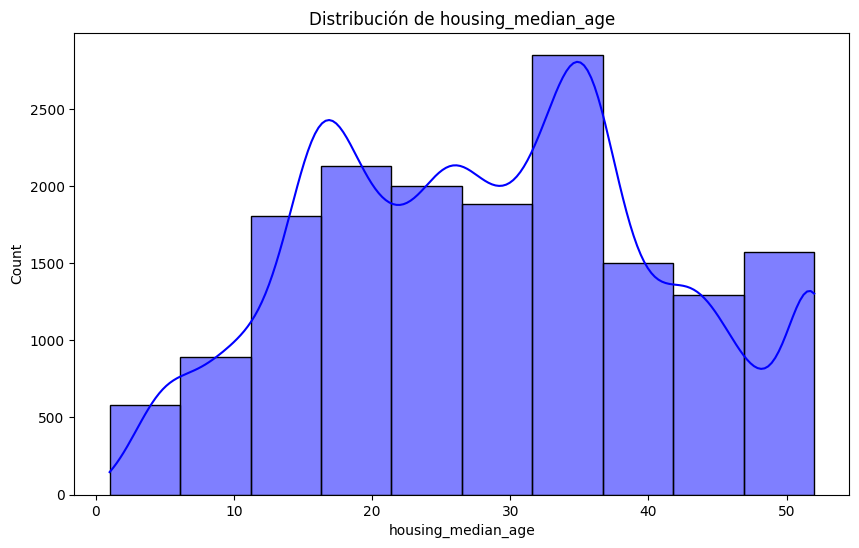

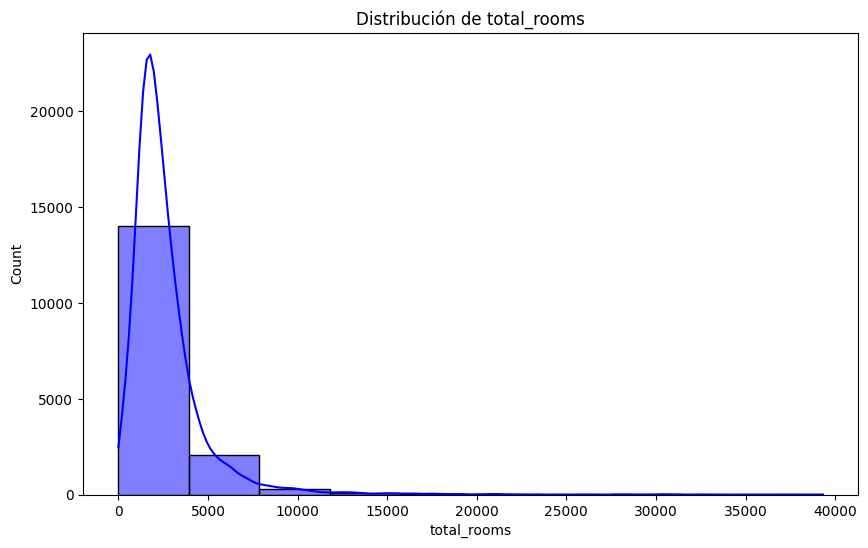

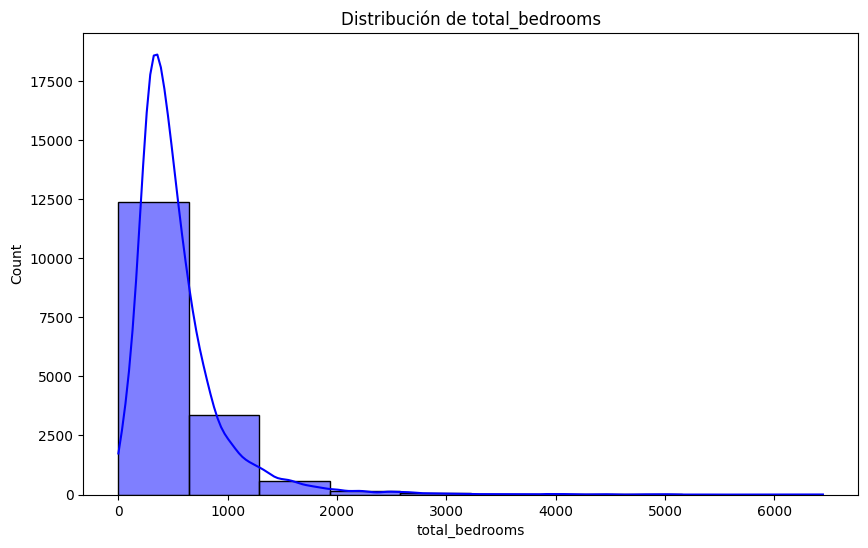

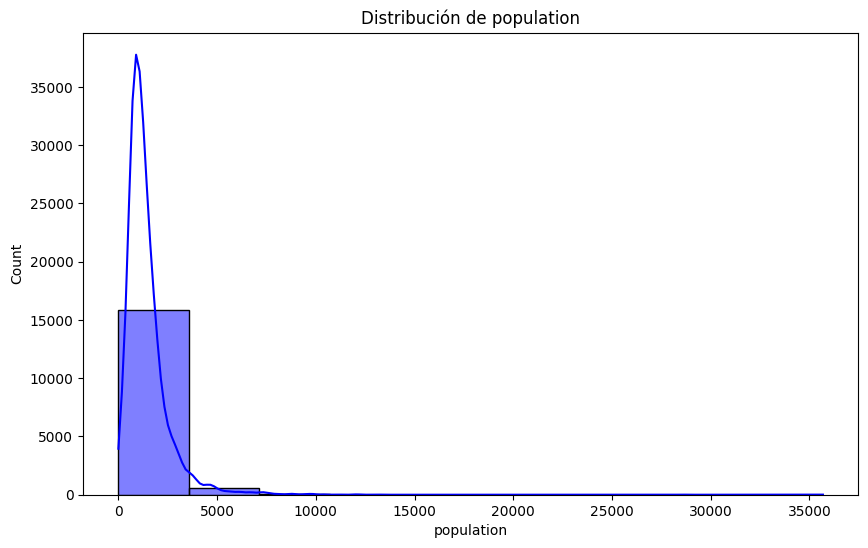

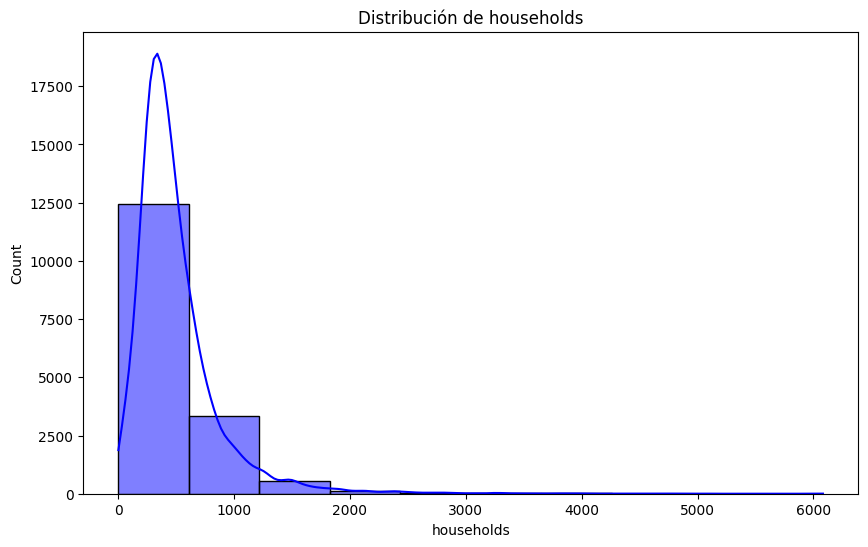

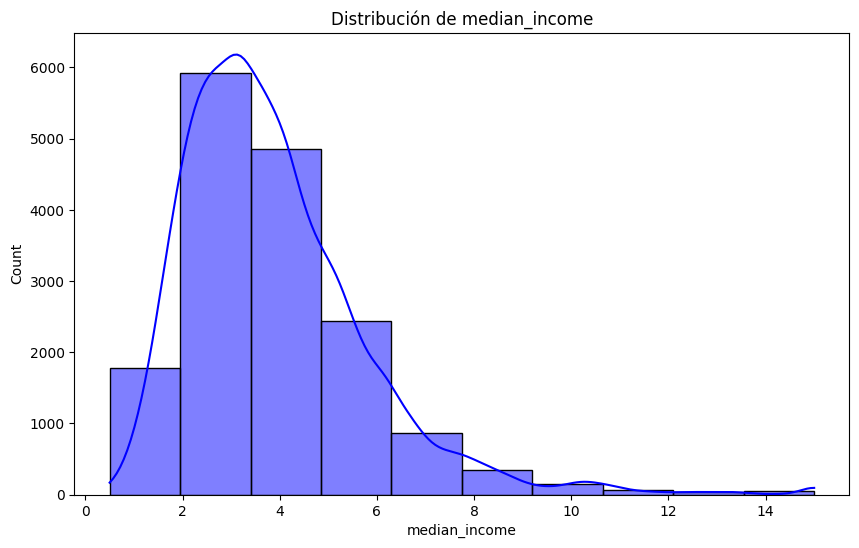

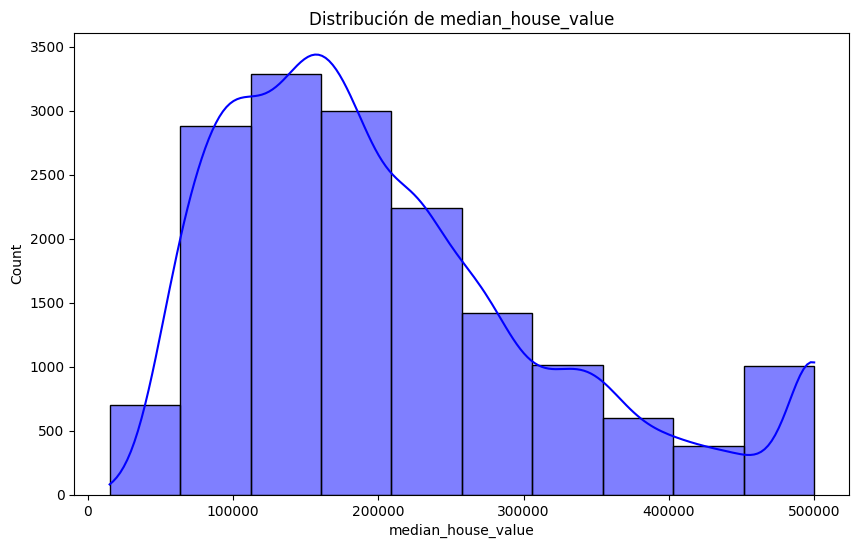

In [23]:
for col in cols:
    plt.figure(figsize=(10,6))
    # df[df['species'] == specie]['body_mass_g'].plot(kind='hist', figsize=(10, 5), title=f'Distribución de la masa corporal de los pingüinos de especie {specie}', color='blue')
    
    sns.histplot(train_set[col], bins=10, kde=True, color='blue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.show()

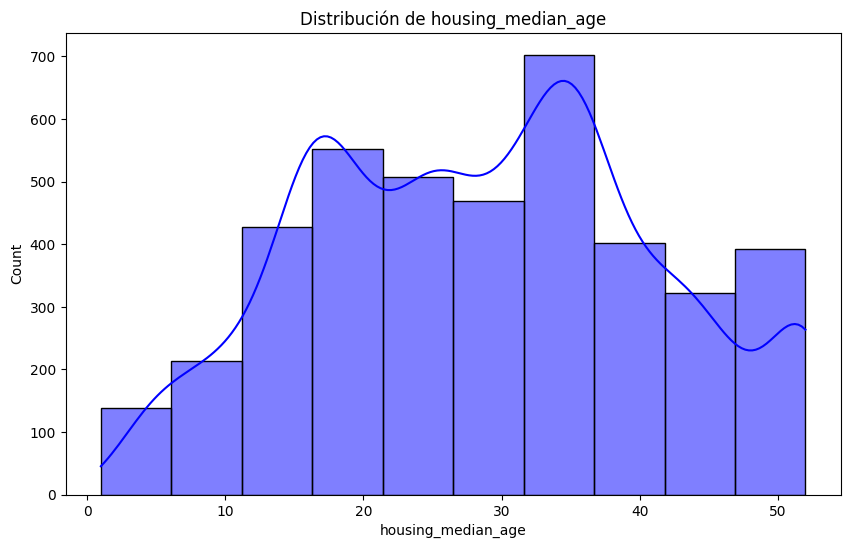

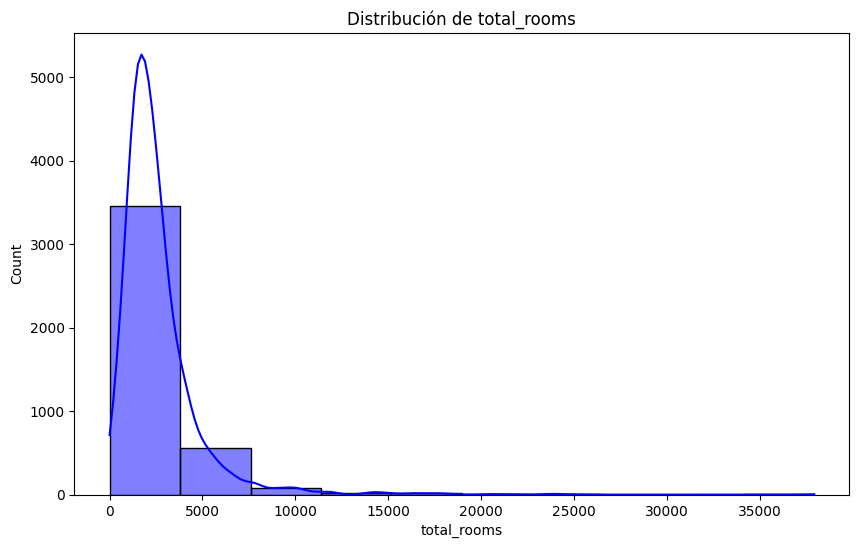

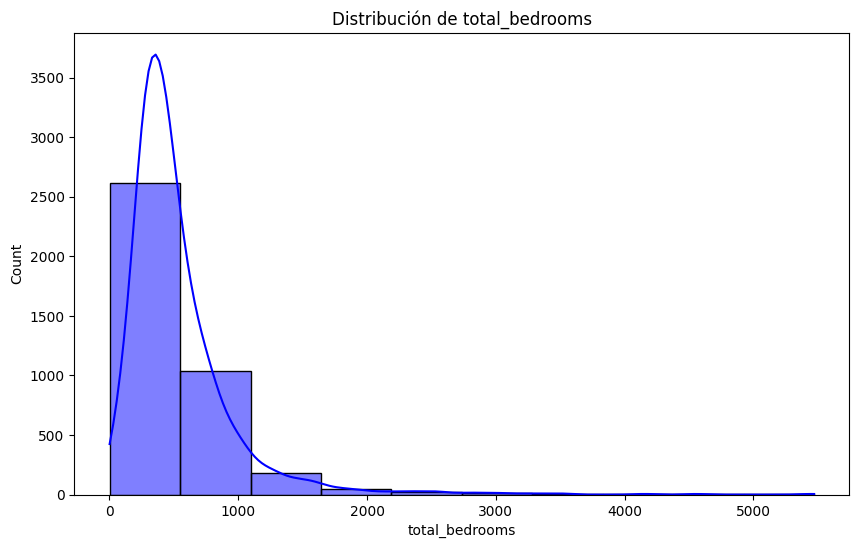

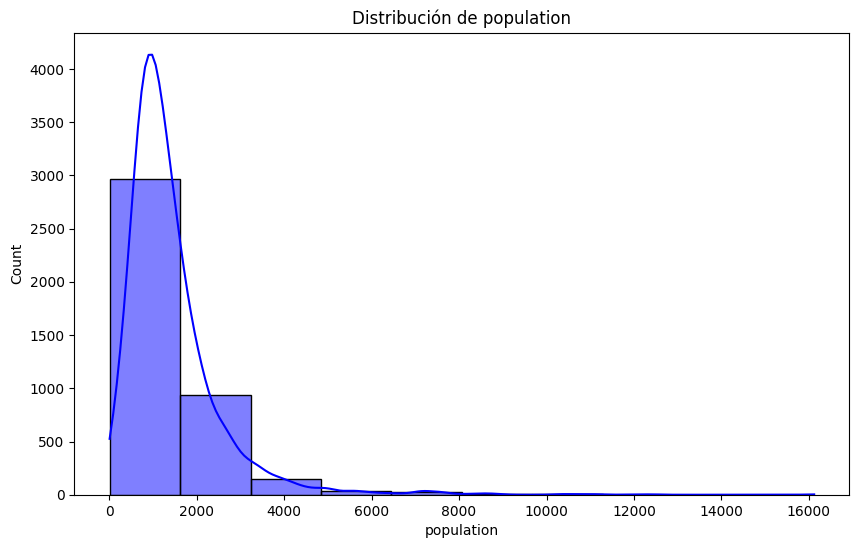

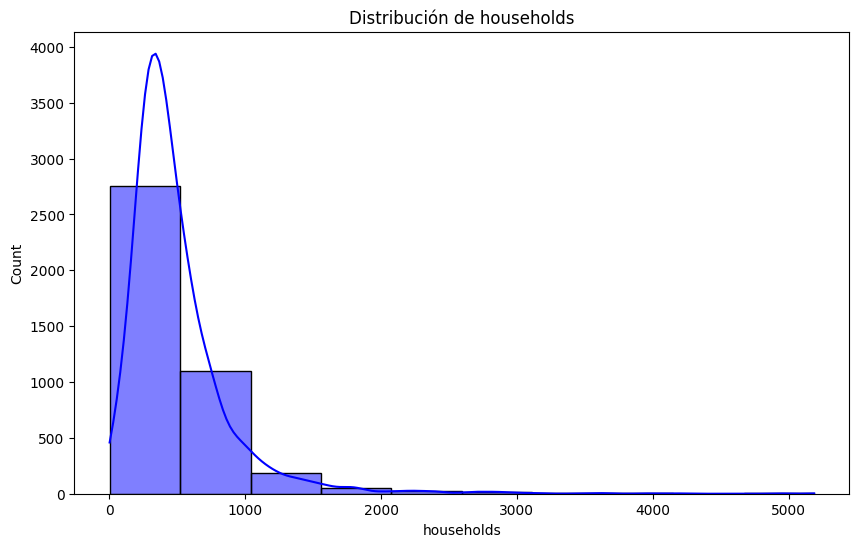

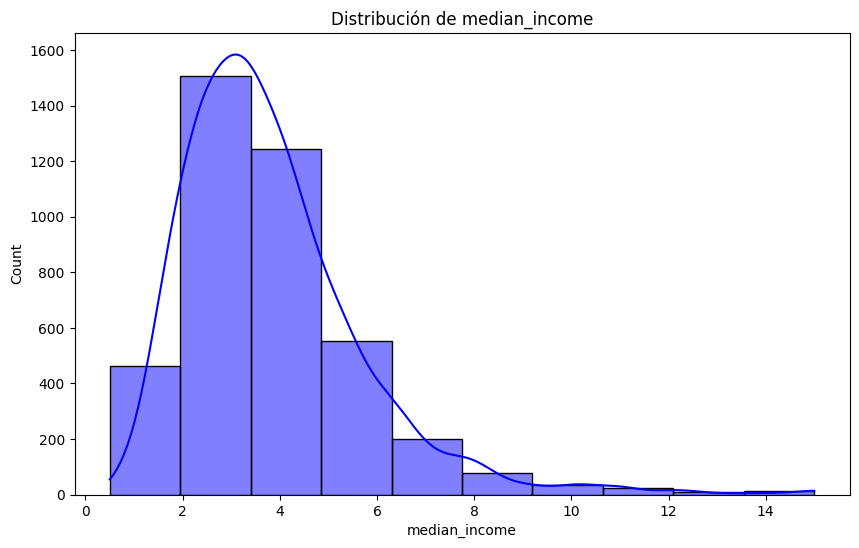

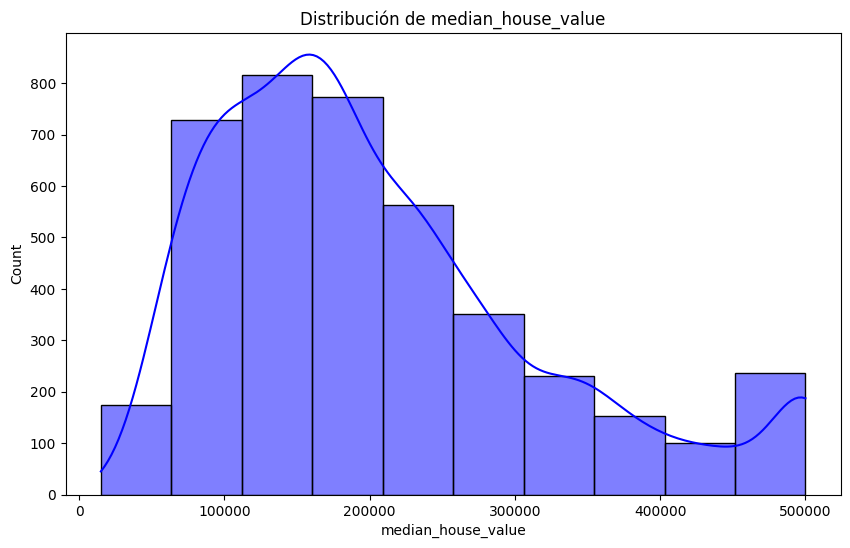

In [24]:
for col in cols:
    plt.figure(figsize=(10,6))
    # df[df['species'] == specie]['body_mass_g'].plot(kind='hist', figsize=(10, 5), title=f'Distribución de la masa corporal de los pingüinos de especie {specie}', color='blue')
    
    sns.histplot(test_set[col], bins=10, kde=True, color='blue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.show()

Una división aleatoria podría resultar en que el conjunto de test no represente fielmente la distribución de ingresos del conjunto completo, lo que afectaría la evaluación del modelo (e.g., subrepresentación de áreas ricas o pobres).

## **12. División del dataset en grupos:**


La siguiente división puede ser realizada  basada en la experticie de lo que se esta analizando, y sobre ello se debe tomar una muestra significativa. Una posible solución al problema puede ser el siguiente:

```python
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


df.income_cat.hist()


```

La forma automatica de realizar la división puede ser la siguiente:

```python
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

```


Analiza las siguiente lineas de código y saca conclusiones referente a las proporciones del dataset.

```python
df["income_cat"].value_counts() / len(df)

strat_train_set["income_cat"].value_counts() / len(strat_train_set)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

train_set["income_cat"].value_counts() / len(train_set)
```

un comparativo general puede ser estructurado de la siguente forma, analiza  los errores:

```python
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)
```

In [25]:
data["income_cat"] = pd.cut(data["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

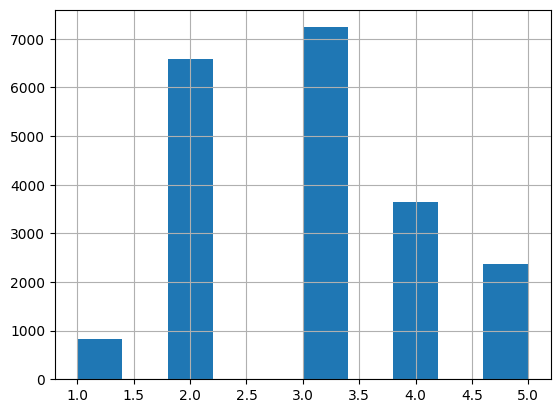

In [26]:
data.income_cat.hist()

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data, data["income_cat"]):
  strat_train_set = data.loc[train_index]
  strat_test_set = data.loc[test_index]

Las siguientes líneas computan las proporciones (frecuencias relativas) de cada categoría en income_cat

In [28]:
# Dataset completo
print(data["income_cat"].value_counts() / len(data))

# Conjunto de entrenamiento estratificado
print(strat_train_set["income_cat"].value_counts() / len(strat_train_set))

# Conjunto de prueba estratificado
print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))


train_set, test_set = train_test_split(data, test_size = 0.2, random_state = 7)

# División aleatoria (sin estratificación)
print(train_set["income_cat"].value_counts() / len(train_set))
print(test_set["income_cat"].value_counts() / len(test_set))

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64
3    0.348716
2    0.324188
4    0.173147
5    0.114159
1    0.039789
Name: income_cat, dtype: float64
3    0.358043
2    0.297481
4    0.188953
5    0.115552
1    0.039971
Name: income_cat, dtype: float64


In [29]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(data, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(data),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)

In [30]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,0.015195
3,0.350581,0.350533,0.358527,2.266446,0.013820
4,0.176308,0.176357,0.167393,5.056334,0.027480
5,0.114438,0.114341,0.109496,4.318374,0.084674


## **13. Puedes agregar nuevas variables al dataframe para el análisis, por ejemplo:**
```python
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]
```

In [31]:
strat_train_set["rooms_per_household"] = strat_train_set["total_rooms"]/strat_train_set["households"]
strat_train_set["bedrooms_per_room"] = strat_train_set["total_bedrooms"]/strat_train_set["total_rooms"]
strat_train_set["population_per_household"]=strat_train_set["population"]/strat_train_set["households"]





# Limpieza de datos

Lo que sigue son códigos que pueden servir para limpiar los datos.

```python

df.isnull().sum()


#df_train.dropna(subset=["total_bedrooms"]) #Eliminar los nan
#df_train.drop("total_bedrooms", axis=1)  # Eliminar la columna
median = df_train["total_bedrooms"].median()
q=df_train["total_bedrooms"].fillna(median).copy()


q=pd.DataFrame(q)

q.isnull().sum()

```

##imputer

Forma automática para tratar los datos (Asegurate de trabajar con las columnas numéricas):


```python
from sklearn.impute import SimpleImputer
#imputer = Imputer(strategy="median")

df_train_num = df_train.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train_num)

imp_mean.statistics_
```

In [32]:
data.isnull().sum()
#strat_train_set.dropna(subset=["total_bedrooms"]) #Eliminar los nan
#strat_train_set.drop("total_bedrooms", axis=1)  # Eliminar la columna
median = strat_train_set["total_bedrooms"].median()
q=strat_train_set["total_bedrooms"].fillna(median).copy()

In [33]:
q=pd.DataFrame(q)

q.isnull().sum()

total_bedrooms    0
dtype: int64

In [34]:
from sklearn.impute import SimpleImputer
#imputer = Imputer(strategy="median")

df_train_num = strat_train_set.drop("ocean_proximity", axis=1)
df_num = data.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer(strategy='mean')

imp_mean.fit(df_train_num)

imp_mean.statistics_

array([-1.19575635e+02,  3.56393144e+01,  2.86534036e+01,  2.62253979e+03,
        5.34914639e+02,  1.41968738e+03,  4.97011810e+02,  3.87588428e+00,
        2.07005322e+05,  3.00678295e+00,  5.44040595e+00,  2.12872772e-01,
        3.09646921e+00])


## **14. Compara las siguientes variables:**
```python
imp_mean.statistics_
df_train_num.median()
```


```python
Constuye la matriz de características:

X = imp_mean.transform(df)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)
```

In [35]:
df_num.shape

(20640, 10)

In [36]:
imp_mean.statistics_
df_train_num.median()

c:\Users\sebas\002_EstudiantesAprendizajeEstadistico\venv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


longitude                     -118.510000
latitude                        34.260000
housing_median_age              29.000000
total_rooms                   2119.000000
total_bedrooms                 433.000000
population                    1164.000000
households                     408.000000
median_income                    3.541550
median_house_value          179500.000000
rooms_per_household              5.232342
bedrooms_per_room                0.203027
population_per_household         2.817661
dtype: float64

In [37]:
X = imp_mean.transform(df_train_num)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)

In [38]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,2.0,5.485836,0.205784,3.168555
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,5.0,6.927083,0.160714,2.623698
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,2.0,5.393333,0.191595,2.223333
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,2.0,3.886128,0.276505,1.859213
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,3.0,6.096552,0.182692,3.167241
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,4.0,6.658342,0.184696,2.023976
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,2.0,5.571932,0.179977,3.363188
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,3.0,4.110465,0.234795,2.662791
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,3.0,6.297405,0.183835,2.411178


# **Manejo de texto y atributos categóricos**

## **15.  ¿Qué realizan las siguientes lineas de código?**

```python
from sklearn.preprocessing import OneHotEncoder
df_train["ocean_proximity"].unique()
housing_cat=df_train[["ocean_proximity"]]
housing_cat

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)


df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)
```

In [39]:
from sklearn.preprocessing import OneHotEncoder
strat_train_set["ocean_proximity"].unique()
housing_cat=strat_train_set[["ocean_proximity"]]
housing_cat

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)

df_cat_1hot = pd.DataFrame(
    housing_cat_1hot.toarray(), 
    columns = cat_encoder.categories_[0],
    index=housing_cat.index   # para mantener el mismo índice
)

# df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)

  (0, 1)	1.0
  (1, 4)	1.0
  (2, 1)	1.0
  (3, 4)	1.0
  (4, 0)	1.0
  (5, 3)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 1)	1.0
  (11, 0)	1.0
  (12, 1)	1.0
  (13, 1)	1.0
  (14, 4)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 3)	1.0
  (19, 0)	1.0
  (20, 1)	1.0
  (21, 3)	1.0
  (22, 1)	1.0
  (23, 0)	1.0
  (24, 1)	1.0
  :	:
  (16487, 1)	1.0
  (16488, 0)	1.0
  (16489, 4)	1.0
  (16490, 4)	1.0
  (16491, 1)	1.0
  (16492, 1)	1.0
  (16493, 0)	1.0
  (16494, 0)	1.0
  (16495, 0)	1.0
  (16496, 1)	1.0
  (16497, 0)	1.0
  (16498, 4)	1.0
  (16499, 0)	1.0
  (16500, 0)	1.0
  (16501, 1)	1.0
  (16502, 1)	1.0
  (16503, 1)	1.0
  (16504, 1)	1.0
  (16505, 0)	1.0
  (16506, 0)	1.0
  (16507, 0)	1.0
  (16508, 1)	1.0
  (16509, 0)	1.0
  (16510, 0)	1.0
  (16511, 1)	1.0
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


# **Escalamiento de variables**


## **16. Las variables pueden ser escaladas como sigue:**

```python

cols=["longitude", "latitude",	"housing_median_age",	"total_rooms",\
      "total_bedrooms",	"population",	"households",	"median_income",\
      "<1H OCEAN",	"INLAND",	"ISLAND",	"NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)


housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

```

In [40]:
cols=["longitude", "latitude",	"housing_median_age",	"total_rooms",\
      "total_bedrooms",	"population",	"households",	"median_income",\
      "<1H OCEAN",	"INLAND",	"ISLAND",	"NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)


housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

## **17. Para todos los pasos anteriores, contruye ordenadamente los pasos limpieza, escalamiento de variables, manejo de texto y atributos categóricos para tener el data frame listo para el análisis. Recuerda dividir el data frame en datos de entrenamiento y de test con la correcta estractificación. Genera dos data frame: housing_train, housing_test, cada una, debe tener las caracteristicas y los datos etiquetados.**

In [41]:
# Creamos el atributo de estratificación (income_cat)
data["income_cat"] = pd.cut(
    data["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5]
)

# Hacemos la división estratificada en train/test
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(data, data["income_cat"]):
    strat_train_set = data.loc[train_idx].drop("income_cat", axis=1)
    strat_test_set  = data.loc[test_idx].drop("income_cat", axis=1)

# Separamos características numéricas y categóricas
train_num = strat_train_set.drop("ocean_proximity", axis=1)
test_num  = strat_test_set.drop("ocean_proximity", axis=1)

train_cat = strat_train_set[["ocean_proximity"]]
test_cat  = strat_test_set[["ocean_proximity"]]

# Hacemos imputación con la mediana para los características numéricas
imputer = SimpleImputer(strategy="median")
imputer.fit(train_num)

train_num_imputed = pd.DataFrame(imputer.transform(train_num),
                                 columns=train_num.columns,
                                 index=train_num.index)

test_num_imputed = pd.DataFrame(imputer.transform(test_num),
                                columns=test_num.columns,
                                index=test_num.index)

# Realizamos el One-Hot encoding para características categóricas
encoder = OneHotEncoder()
train_cat_1hot = encoder.fit_transform(train_cat)
test_cat_1hot  = encoder.transform(test_cat)

train_cat_df = pd.DataFrame(train_cat_1hot.toarray(),
                            columns=encoder.categories_[0],
                            index=train_cat.index)

test_cat_df = pd.DataFrame(test_cat_1hot.toarray(),
                           columns=encoder.categories_[0],
                           index=test_cat.index)


# Unimos numéricas imputadas y categóricas codificadas
train_full = train_num_imputed.join(train_cat_df)
test_full  = test_num_imputed.join(test_cat_df)

# Escalamos con MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_full)

train_scaled = pd.DataFrame(scaler.transform(train_full),
                            columns=train_full.columns,
                            index=train_full.index)

test_scaled = pd.DataFrame(scaler.transform(test_full),
                           columns=test_full.columns,
                           index=test_full.index)

# Añadimos etiqueta (median_house_value)
# Usamos pd.merge() para evitar problemas si hay columna duplicada
housing_train = train_scaled.merge(
    strat_train_set[["median_house_value"]],
    left_index=True, right_index=True
)

housing_test = test_scaled.merge(
    strat_test_set[["median_house_value"]],
    left_index=True, right_index=True
)

# Observamos la forma de los datos de entrenamiento y prueba preprocesados
print("Train shape:", housing_train.shape)
print("Test shape: ", housing_test.shape)

Train shape: (16512, 15)
Test shape:  (4128, 15)


In [42]:
housing_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value_x,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value_y
12655,0.287849,0.635494,0.549020,0.098362,0.128061,0.062614,0.131441,0.115426,0.117734,0.0,1.0,0.0,0.0,0.0,72100.0
15502,0.709163,0.058448,0.117647,0.135168,0.137403,0.056392,0.143017,0.402574,0.545567,0.0,0.0,0.0,0.0,1.0,279600.0
2908,0.528884,0.300744,0.843137,0.041003,0.049613,0.018610,0.055639,0.163798,0.139589,0.0,1.0,0.0,0.0,0.0,82700.0
14053,0.719124,0.022317,0.450980,0.047591,0.083280,0.025085,0.089806,0.119067,0.201032,0.0,0.0,0.0,0.0,1.0,112500.0
20496,0.562749,0.184910,0.509804,0.089790,0.103737,0.051403,0.107916,0.275617,0.460413,1.0,0.0,0.0,0.0,0.0,238300.0


In [43]:
housing_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value_x,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value_y
5241,0.593625,0.167906,0.549020,0.163835,0.162693,0.061128,0.178865,0.536662,1.000000,1.0,0.0,0.0,0.0,0.0,500001.0
17352,0.391434,0.249734,0.450980,0.051229,0.049130,0.023880,0.052465,0.311030,0.304125,1.0,0.0,0.0,0.0,0.0,162500.0
3505,0.587649,0.181722,0.686275,0.036806,0.043170,0.022562,0.050971,0.267858,0.390928,1.0,0.0,0.0,0.0,0.0,204600.0
7777,0.622510,0.145590,0.666667,0.041893,0.052030,0.029962,0.055825,0.191094,0.298351,1.0,0.0,0.0,0.0,0.0,159700.0
14155,0.725100,0.024442,0.725490,0.095971,0.098582,0.041817,0.114264,0.265720,0.348454,0.0,0.0,0.0,0.0,1.0,184000.0


In [44]:
# Entrenamos modelo de Regresión Lineal
X_train = housing_train.drop("median_house_value_y", axis=1)
y_train = housing_train["median_house_value_y"]
X_test  = housing_test.drop("median_house_value_y", axis=1)
y_test  = housing_test["median_house_value_y"]

model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
score_default = model.score(X_test, y_test)

print(f"R² score: {r2:.4f}")
print(f"MSE: {mse:.2f}, RMSE: {rmse:.2f}")
print(f"model.score(): {score_default:.4f}")

R² score: 1.0000
MSE: 0.00, RMSE: 0.00
model.score(): 1.0000


In [45]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value_x,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12655,0.287849,0.635494,0.549020,0.098362,0.128061,0.062614,0.131441,0.115426,0.117734,0.0,1.0,0.0,0.0,0.0
15502,0.709163,0.058448,0.117647,0.135168,0.137403,0.056392,0.143017,0.402574,0.545567,0.0,0.0,0.0,0.0,1.0
2908,0.528884,0.300744,0.843137,0.041003,0.049613,0.018610,0.055639,0.163798,0.139589,0.0,1.0,0.0,0.0,0.0
14053,0.719124,0.022317,0.450980,0.047591,0.083280,0.025085,0.089806,0.119067,0.201032,0.0,0.0,0.0,0.0,1.0
20496,0.562749,0.184910,0.509804,0.089790,0.103737,0.051403,0.107916,0.275617,0.460413,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,0.725100,0.052072,0.254902,0.169380,0.197970,0.056700,0.186520,0.316554,0.522680,1.0,0.0,0.0,0.0,0.0
12661,0.291833,0.634431,0.274510,0.200819,0.228737,0.133580,0.264376,0.159584,0.155465,0.0,1.0,0.0,0.0,0.0
19263,0.162351,0.626993,0.921569,0.017831,0.026418,0.012753,0.031740,0.184811,0.258558,1.0,0.0,0.0,0.0,0.0
19140,0.164343,0.613177,0.254902,0.080099,0.093106,0.033773,0.093167,0.254928,0.501237,1.0,0.0,0.0,0.0,0.0


- **a)¿que puede concluir respecto al modelo empleado?**
Al ser un modelo de regresión lineal simple, se vuelve muy interpretable y rápido, pero depende de supuestos fuertes para ser fiable, como asumir linealidad entre las variables de interés.

- **b) ¿El modelo de regresión lineal es valido para lo construido?**
Considero que sí es válido usarlo, pero un como punto de partida, pues, de nuevo, su validez depende fuertemente del cumplimiento de los supuestos mencionados antes.

- **c) ¿qué informacion nos da el score?**
Según lo visto, el modelo se adaptó perfectamente a los datos, lo que es un tanto sospechoso.

- **d) ¿Puede ser ajustado a otro modelo?**
Considero que modelos más robustos o que añadan no linealidad son opciones válidas para evitar sobreajuste y adaptarse mejor a los datos.

### **e) ¿Cómo puede autmatizar todo el proceso empleando pipelines?**

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Definimos las columnas numéricas y categóricas
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove("median_house_value") if "median_house_value" in num_cols else None
cat_cols = ["<1H OCEAN", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN"]

# Creamos pequeños pipelines individuales
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Este método sirve para aplicar pipelines a regiones correspondientes
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])

# Pipeline total: preprocesamiento + modelo de regresión
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("linreg", LinearRegression())
])

# Entrenamiento del pipeline
full_pipeline.fit(X_train, y_train)

# Predicción y evaluación
y_pred = full_pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.4f}, RMSE: {rmse:.2f}")

R²: 1.0000, RMSE: 0.00
